# Nguyen Thi Kieu Nhung 11203041 W5


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Dùng thuật toán gradient descent, implement thuật toán logistic regeression

In [30]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def sigmoid(self, x):
        return np.exp(x) / (1 + np.exp(x))

    def transform_x(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
  
    def fit(self, X, y):
        self.X = self.transform_x(X)
        self.w = np.zeros((X.shape[1]+1, 1))
        self.cost = np.zeros((self.iterations, 1))
        for i in range(self.iterations):
          # predicted value
          y_predict = self.sigmoid(np.dot(self.X, self.w))
          self.cost[i] = np.sum((-y * np.log(y_predict) - (1 - y) * np.log(1 - y_predict)))
        
          # Gradient descent
          gradient = np.dot(self.X.T, y_predict - y)
          self.w -= self.learning_rate * gradient

    def cost(self):
        return self.cost
    
    def predict_prob(self, X):
        return self.sigmoid(np.dot(self.transform_x(X), self.w))
    
    def predict(self, X):
        return self.predict_prob(X).round()

3. Chạy toán toán logistic regression implement ở ý 2 cho dataset, https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv.

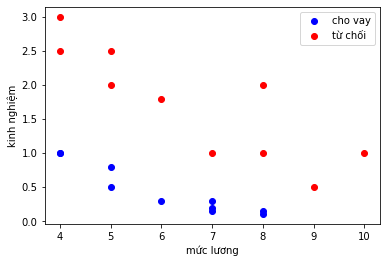

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv").values
N, d = data.shape
data
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, d-1].reshape(-1, 1)

plt.scatter(x[y[:, 0] == 0][:, 0], x[y[:, 0] == 0][:, 1], color='b', label='cho vay')
plt.scatter(x[y[:, 0] == 1][:, 0], x[y[:, 0] == 1][:, 1], color='r', label='từ chối')
plt.xlabel('mức lương')
plt.ylabel('kinh nghiệm')
plt.legend()


4. Vẽ đường boundary cho 2 class


In [35]:
model = LogisticRegression(learning_rate=0.01, iterations=10000)
model.fit(x, y)

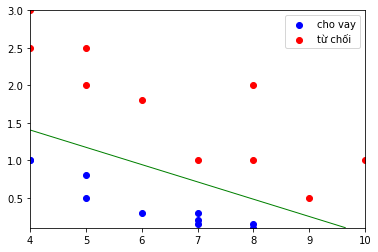

In [36]:
x1_min, x1_max = x[:,0].min(), x[:,0].max(),
x2_min, x2_max = x[:,1].min(), x[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.scatter(x[y[:, 0] == 0][:, 0], x[y[:, 0] == 0][:, 1], color='b', label='cho vay')
plt.scatter(x[y[:, 0] == 1][:, 0], x[y[:, 0] == 1][:, 1], color='r', label='từ chối')
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='g')
plt.legend()